In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ;  sns.set_theme()


In [3]:
#load dataset
heart_dataset_filepath = "C:/Users/z004fuuz/Desktop/ML/heart.csv" 
heart_dataset = pd.read_csv(heart_dataset_filepath)
heart_dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Data and Feature Numbers
heart_dataset.shape

(303, 14)

<AxesSubplot:>

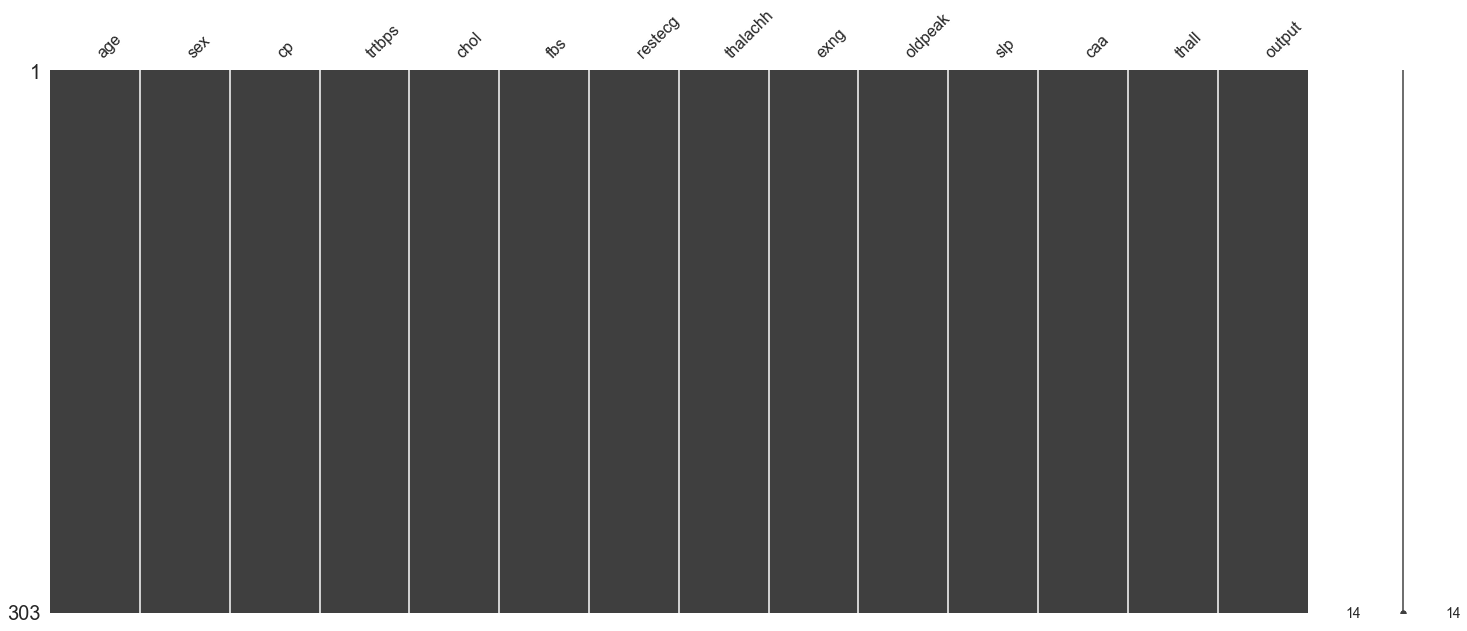

In [5]:
#Delete missing values
import missingno as msng
msng.matrix(heart_dataset) #no missing data

<AxesSubplot:>

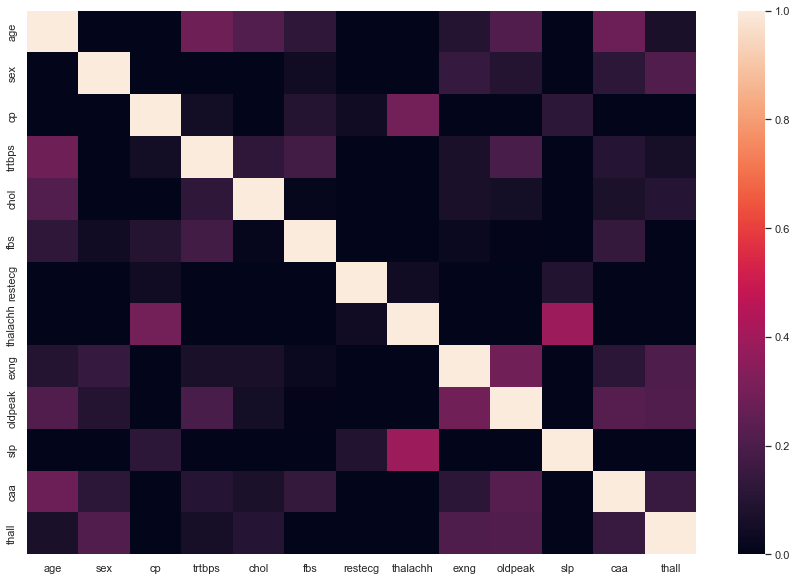

In [15]:
#check correlation
plt.figure(figsize=(15,10))
heart_dataset_without_output = heart_dataset.drop("output", axis = 1)
correlation_df = heart_dataset_without_output.corr() #gives correlation as negative or positive number
sns.heatmap(correlation_df,vmin=0, vmax=1)  #vmin, vmax for see clearly, it changes limits of colormap

In [7]:
#Find correlated features
correlated_features = ['slp','thalachh']

In [10]:
#X and Y preparation
X = heart_dataset_without_output
Y = heart_dataset["output"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8, random_state = 42)
X_train.shape , y_train.shape

((242, 13), (242,))

In [11]:
#Train Dataset
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) #you dont have to give these infos
sgd_classifier.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [13]:
#Calculate Error Rate 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#numpy.ravel = returns a flattened array

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train, cv=3)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
tn, fp, fn, tp

(62, 47, 47, 86)

In [14]:
positive_rate = tp / (tp + fp)
negative_rate = tn / (tn + fn)
positive_rate, negative_rate

(0.6466165413533834, 0.5688073394495413)